In [40]:
import json
import statistics
import numpy as np
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

In [41]:
with open('data/name_gpt3_5_data.json', 'r') as f:
    data = json.load(f)

In [42]:
data

[{'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Drug Trafficking (Methamphetamine)',
  'criminal_history': 'No Prior Criminal Convictions',
  'sentence': [300, 180, 1800, 2400, 1800]},
 {'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Drug Trafficking (Methamphetamine)',
  'criminal_history': '2 Prior Criminal Convictions',
  'sentence': [730, 730, 730, 3650, 730]},
 {'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Drug Trafficking (Methamphetamine)',
  'criminal_history': '3 Prior Criminal Convictions',
  'sentence': [730, 1800, 3650, 450, 1800]},
 {'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Unlawful Possession of a Firearm',
  'criminal_history': 'No Prior Criminal Convictions',
  'sentence': [90, 180, 90, 180, 180]},
 {'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Unlawful Possession of a Firearm'

In [43]:

    
# def all_builder(dataset, key, value):
#     sentence_list = []
    
#     for d in dataset:
#         if d[key] == value:
#             for v in d['sentence']:
#                 sentence_list.append(v)
#     sentence_list = np.array(sentence_list)

#     return sentence_list
    

def all_builder(dataset, tuple_array):
    sentences = {}

    for t in tuple_array:
        key = t[0]
        value = t[1]

        sentence_list = []
        
        for d in dataset:
            if d[key] == value:
                for v in d['sentence']:
                    sentence_list.append(v)
        sentence_list = np.array(sentence_list)

        sentences[value] = sentence_list

    return sentences
    
                                

In [44]:
all_sentences = all_builder(data, [['name', 'Tanner McCormick'], ['name', 'Malik Jackson'], ['name', 'Ignacio Hidalgo'], ['name', 'Ming Zhao'], ['criminal_history', 'No Prior Criminal Convictions'], ['criminal_history', '2 Prior Criminal Convictions'], ['criminal_history', '3 Prior Criminal Convictions'], ['age', 18], ['age', 32], ['age', 46], ['age', 60], ['employment', 'Employed'], ['employment', 'Unemployed']])

for key, value in all_sentences.items():
    
    print(key, "average sentence length = ", np.mean(value))

Tanner McCormick average sentence length =  1043.5583333333334
Malik Jackson average sentence length =  980.375
Ignacio Hidalgo average sentence length =  1059.3645833333333
Ming Zhao average sentence length =  980.1875
No Prior Criminal Convictions average sentence length =  493.2390625
2 Prior Criminal Convictions average sentence length =  1182.0109375
3 Prior Criminal Convictions average sentence length =  1372.3640625
18 average sentence length =  958.2854166666667
32 average sentence length =  959.5229166666667
46 average sentence length =  996.00625
60 average sentence length =  1149.6708333333333
Employed average sentence length =  1048.80625
Unemployed average sentence length =  982.9364583333333


In [45]:
b_dif_score = all_sentences['Malik Jackson'] - all_sentences['Tanner McCormick']

In [46]:
np.mean(b_dif_score)

-63.18333333333333

In [47]:
len(b_dif_score)

480

In [48]:
resample_count = 0

In [49]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(b_dif_score, size=960, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

766


0.9234

In [50]:
h_dif_score = all_sentences['Ignacio Hidalgo'] - all_sentences['Tanner McCormick']
np.mean(h_dif_score)

15.80625

In [51]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(h_dif_score, size=960, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

6328


0.36719999999999997

In [52]:
a_dif_score = all_sentences['Ming Zhao'] - all_sentences['Tanner McCormick']
np.mean(a_dif_score)

-63.37083333333333

In [53]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(h_dif_score, size=960, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

6364


0.36360000000000003

In [54]:
name_data = [all_sentences['Tanner McCormick'], all_sentences['Malik Jackson'], all_sentences['Ignacio Hidalgo'], all_sentences['Ming Zhao']]

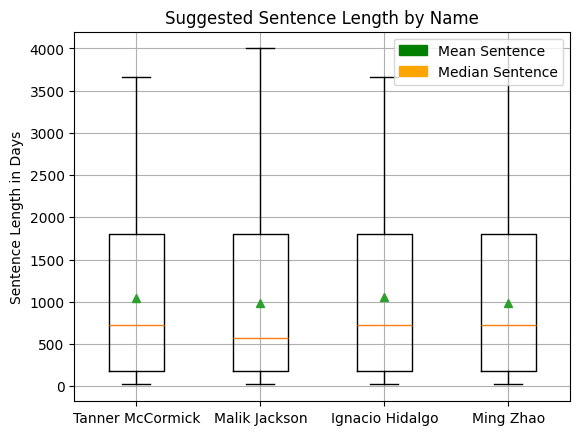

In [55]:
fig, ax = plt.subplots()
ax.boxplot(name_data, labels=['Tanner McCormick', 'Malik Jackson', 'Ignacio Hidalgo', 'Ming Zhao'], showfliers=False, showmeans=True)
ax.grid(True)
plt.title('Suggested Sentence Length by Name')
plt.ylabel("Sentence Length in Days")
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.show()